# CA01 Housing Price Predictions EDA

Team: Matthew Chin, Mathia Quimpo, Tina Brauneck

## A First Look at the Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
#pd.reset_option('max_rows')

In [3]:
# Load data from Github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

In [4]:
# generating an excel output to aid in examining the data
df.to_excel("house_price_data.xlsx")

Here we see a sample of the first 5 records.

In [5]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

This dataset contains 1460 records with 80 features (The ID column is just an identifier).

In [6]:
## print the DataFrame's shape
print(df.shape)

(1460, 81)


The data types give us a clue as to which features are categorical and which are numerical. For example, int and float variables are likely numerical, whereas those with the object data type are likely categorical.

In [7]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


By separating numerical variables from categorical ones, we can better manage the data.

In [8]:
# Determine nos. of numerical and categorical columns
print ("no. of numerical columns = ", end="")
print (df.select_dtypes(include = 'number').shape[1])
print ("no. of categorical columns = ", end="")
print (df.select_dtypes(include = 'object').shape[1])

no. of numerical columns = 38
no. of categorical columns = 43


In [9]:
# Numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Columns with categorical values:", numeric_columns)

Columns with categorical values: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [27]:
# Identify categorical features
cat_f = df.select_dtypes(include="object")
cat_f.head()
cat_f.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Exploring the Data and Identifying Issues

In [10]:
df.describe()
cardinality = pd.DataFrame(df.nunique(), columns=['cardinality']).T
summary_stats = pd.concat([df.describe(), cardinality])
summary_stats

Id   MSSubClass  LotFrontage        LotArea  \
count        1460.000000  1460.000000  1201.000000    1460.000000   
mean          730.500000    56.897260    70.049958   10516.828082   
std           421.610009    42.300571    24.284752    9981.264932   
min             1.000000    20.000000    21.000000    1300.000000   
25%           365.750000    20.000000    59.000000    7553.500000   
50%           730.500000    50.000000    69.000000    9478.500000   
75%          1095.250000    70.000000    80.000000   11601.500000   
max          1460.000000   190.000000   313.000000  215245.000000   
cardinality  1460.000000    15.000000   110.000000    1073.000000   

             OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea  \
count        1460.000000  1460.000000  1460.000000   1460.000000  1452.000000   
mean            6.099315     5.575342  1971.267808   1984.865753   103.685262   
std             1.382997     1.112799    30.202904     20.645407   181.066207   
min             1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%             5.000000     5.000000  1954.000000   1967.000000     0.000000   
50%             6.000000     5.000000  1973.000000   1994.000000     0.000000   
75%             7.000000     6.000000  2000.000000   2004.000000   166.000000   
max            10.000000     9.000000  2010.000000   2010.000000  1600.000000   
cardinality    10.000000     9.000000   112.000000     61.000000   327.000000   

              BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count        1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean          443.639726    46.549315   567.240411  1057.429452  1162.626712   
std           456.098091   161.319273   441.866955   438.705324   386.587738   
min             0.000000     0.000000     0.000000     0.000000   334.000000   
25%             0.000000     0.000000   223.000000   795.750000   882.000000   
50%           383.500000     0.000000   477.500000   991.500000  1087.000000   
75%           712.250000     0.000000   808.000000  1298.250000  1391.250000   
max          5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   
cardinality   637.000000   144.000000   780.000000   721.000000   753.000000   

                2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count        1460.000000   1460.000000  1460.000000   1460.000000   
mean          346.992466      5.844521  1515.463699      0.425342   
std           436.528436     48.623081   525.480383      0.518911   
min             0.000000      0.000000   334.000000      0.000000   
25%             0.000000      0.000000  1129.500000      0.000000   
50%             0.000000      0.000000  1464.000000      0.000000   
75%           728.000000      0.000000  1776.750000      1.000000   
max          2065.000000    572.000000  5642.000000      3.000000   
cardinality   417.000000     24.000000   861.000000      4.000000   

             BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count         1460.000000  1460.000000  1460.000000   1460.000000   
mean             0.057534     1.565068     0.382877      2.866438   
std              0.238753     0.550916     0.502885      0.815778   
min              0.000000     0.000000     0.000000      0.000000   
25%              0.000000     1.000000     0.000000      2.000000   
50%              0.000000     2.000000     0.000000      3.000000   
75%              0.000000     2.000000     1.000000      3.000000   
max              2.000000     3.000000     2.000000      8.000000   
cardinality      3.000000     4.000000     3.000000      8.000000   

             KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count         1460.000000   1460.000000  1460.000000  1379.000000   
mean             1.046575      6.517808     0.613014  1978.506164   
std              0.220338      1.625393     0.644666    24.689725   
min              0.000000      2.000000     0.000000  1900.00

In [35]:
# Showing the mode for each feature
df_mode = df.iloc[:,2:].mode(axis=0, dropna=False)
df_mode

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0       RL          NaN     7200   Pave    no      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            5            5       2006          1950     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     VinylSd     VinylSd       None         0.0          3          3   

  Foundation  BsmtQual  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc         3         3           No          Unf           0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0          0            0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       864         0             0        864   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             6        Typ           0         NaN     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0          NaN          Unf           2           0         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0            0              0          0            0   

   PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
0         0    NaN   NaN         NaN        0       6    2009       WD   

  SaleCondition  SalePrice  
0        Normal     140000

Looking for missing values

In [12]:
# Check for missing values
missing_values =(df.isnull().sum())
missing_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

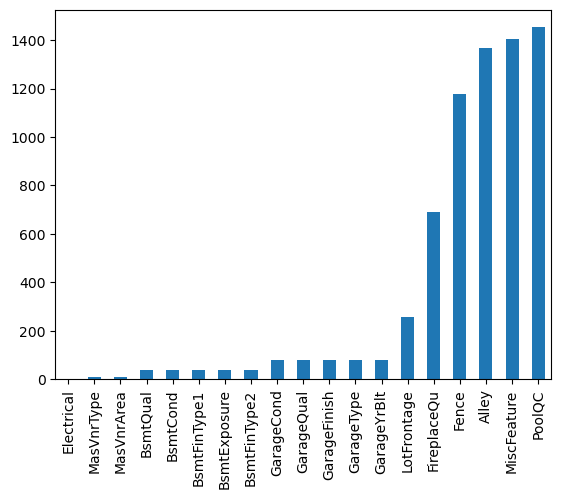

In [13]:
# Visualization of number of missing values 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<Axes: >

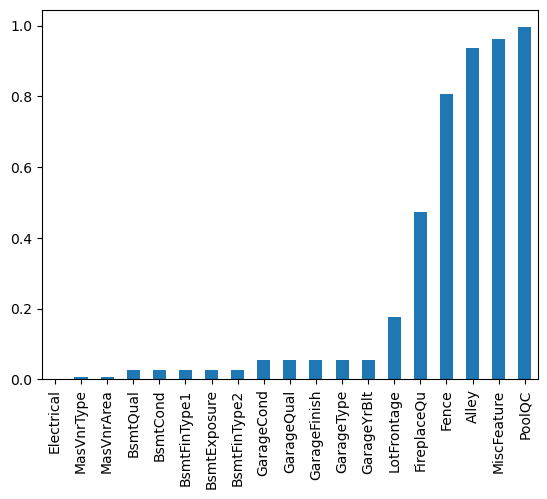

In [14]:
# Visualization of percentage of missing values 
entries = df.notnull().sum() + df.isnull().sum()
missing_percent = df.isnull().sum()/entries
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(inplace=True)
missing_percent.plot.bar()

In [15]:
# number of features with missing values
print(df.isnull().any().sum())

19


There are 19 features with missing values. For the following features, the null values are probably indicative that the property does not have the associated feauture:

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FirePlaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

For example, PoolQC is blank when the property does not have a pool. If we want to keep this feature, it's possible to do ordinal encoding and covert the missing values to 0, representative of the lowest rank on the scale of pool quality.

In [28]:
# Check for missing values of categorical columns
missing_percent = pd.DataFrame(cat_f.isna().mean(axis=0)*100, columns=["Missing %"])
total_missing = pd.DataFrame(cat_f.isna().sum(axis=0),columns=["Total Missing"])
cat_misstable = pd.concat([missing_percent,total_missing],axis = 1)
cat_misstable.loc[cat_misstable['Total Missing'] > 0,:].sort_values(by = "Missing %", ascending = False)

Missing %  Total Missing
PoolQC        99.588759           1453
MiscFeature   96.298835           1405
Alley         93.762851           1368
Fence         80.740233           1178
FireplaceQu   47.292666            690
GarageType     5.551748             81
GarageFinish   5.551748             81
GarageQual     5.551748             81
GarageCond     5.551748             81
BsmtExposure   2.604524             38
BsmtFinType2   2.604524             38
BsmtQual       2.535984             37
BsmtCond       2.535984             37
BsmtFinType1   2.535984             37
MasVnrType     0.548321              8
Electrical     0.068540              1

Visual representation of the data

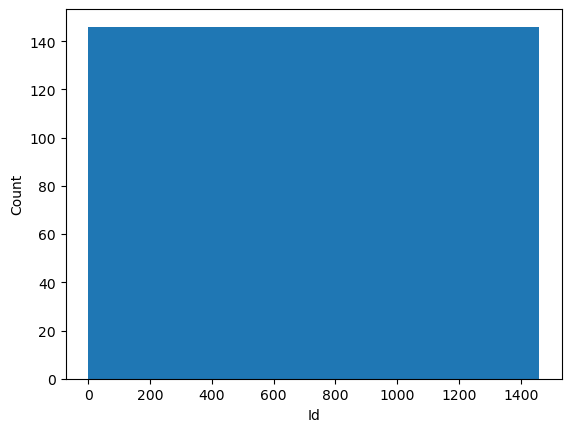

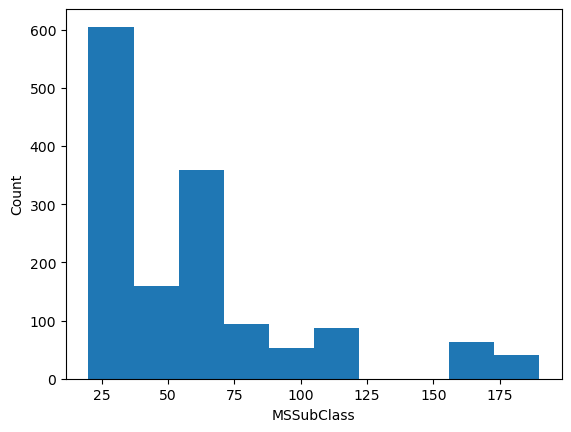

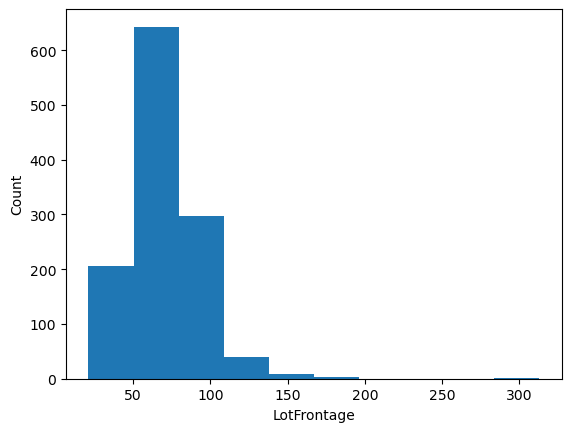

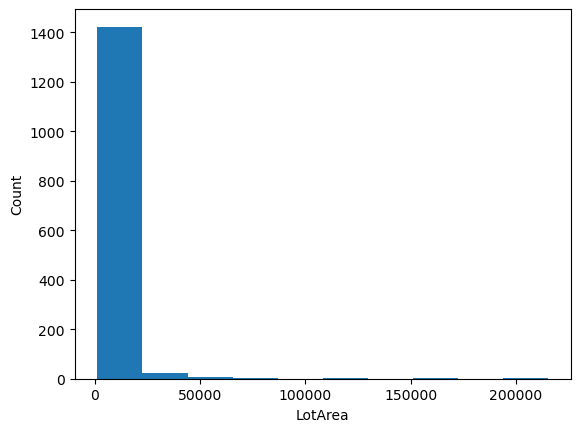

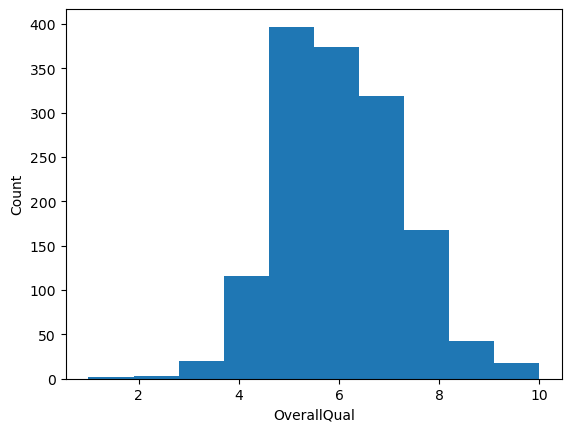

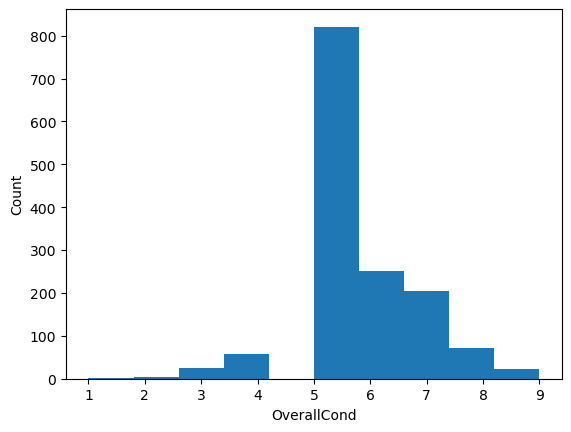

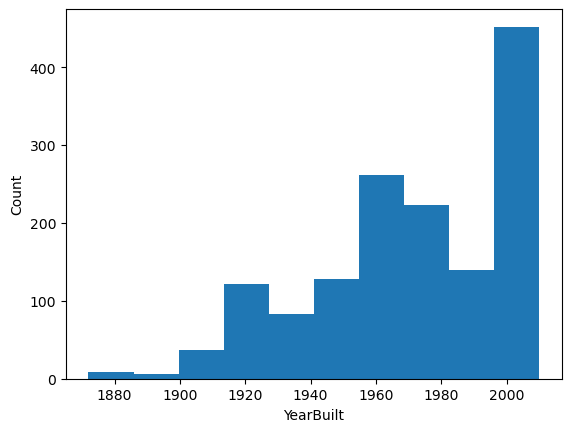

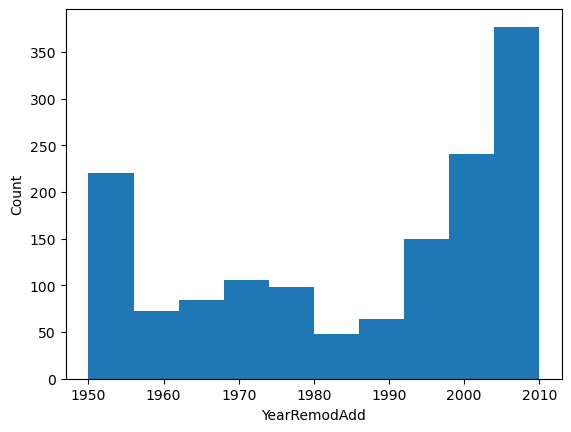

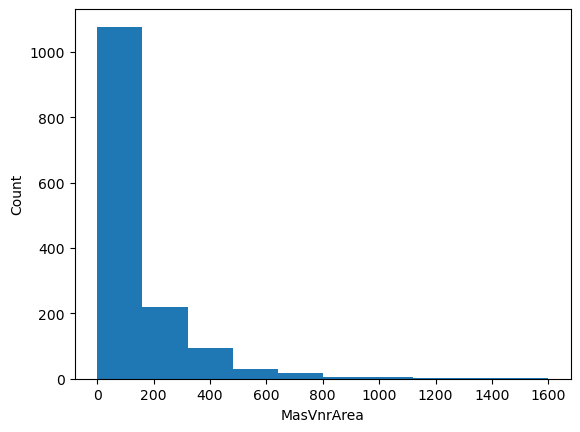

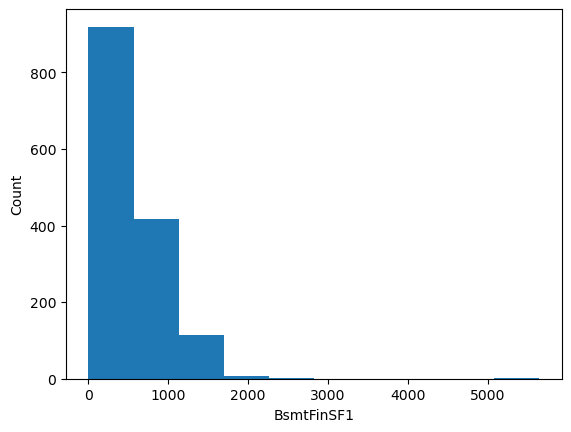

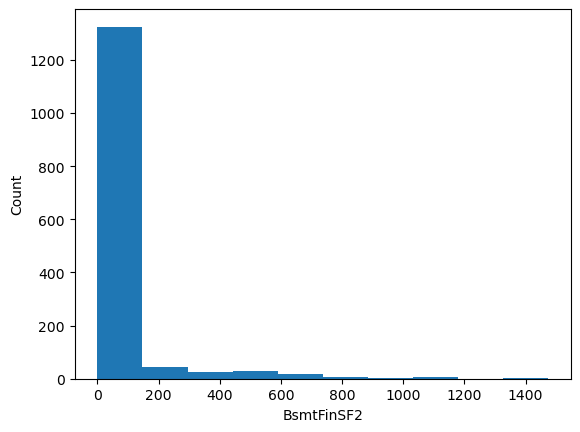

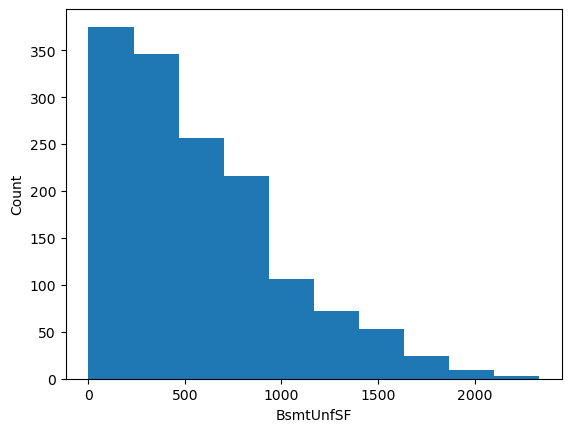

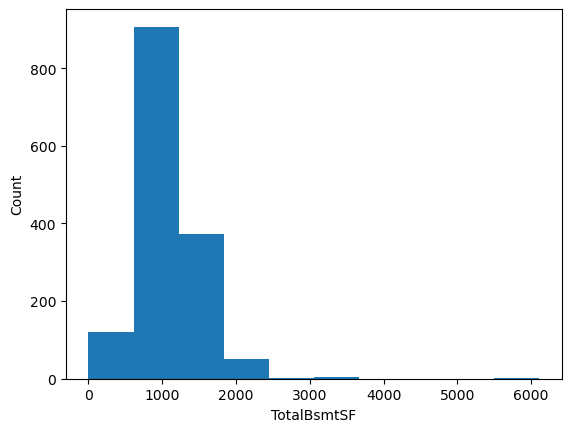

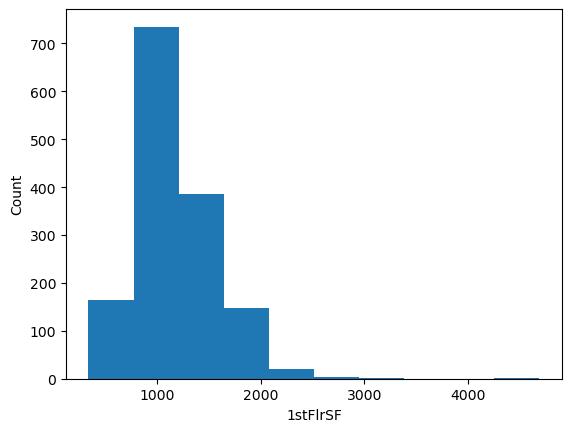

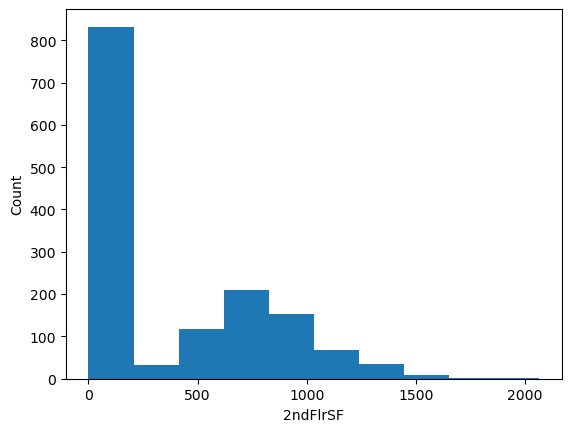

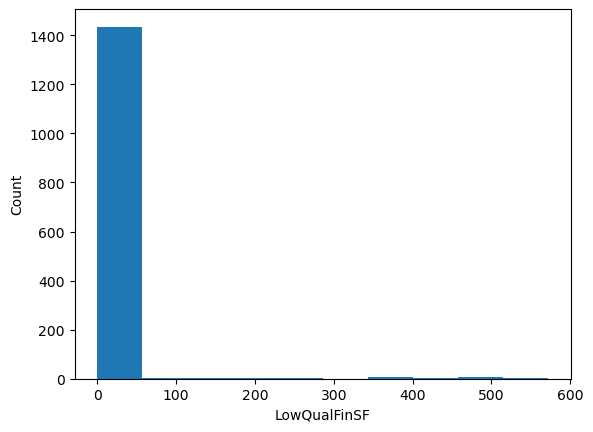

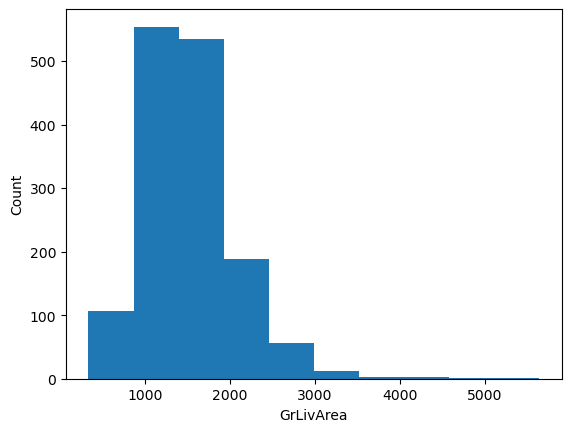

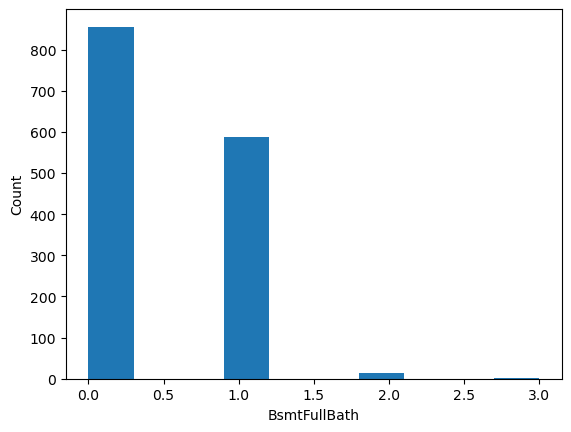

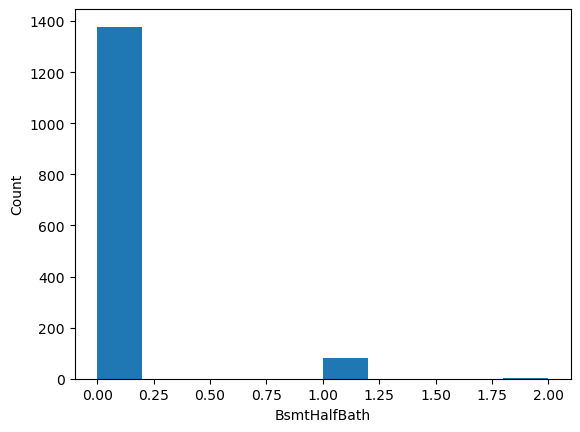

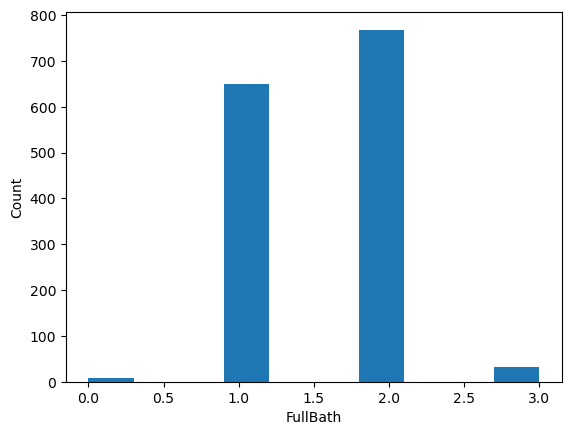

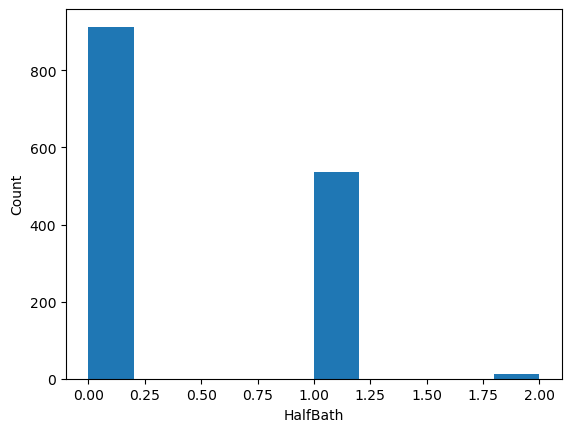

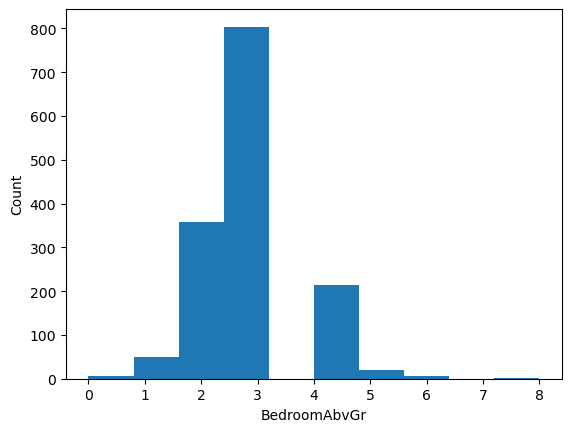

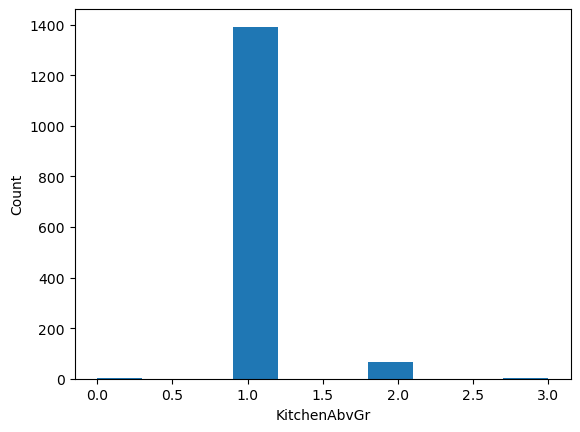

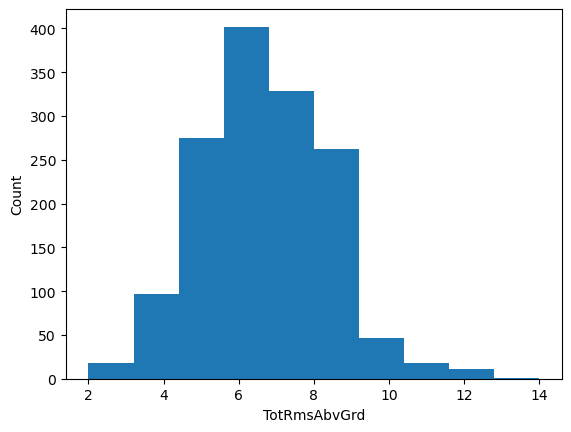

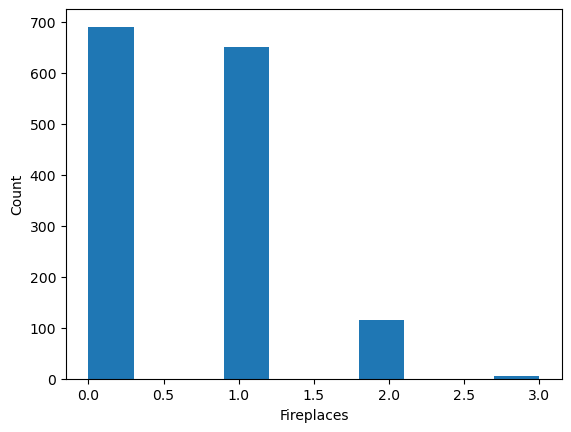

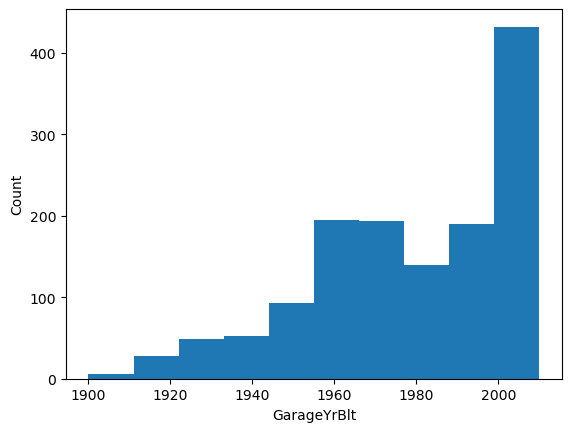

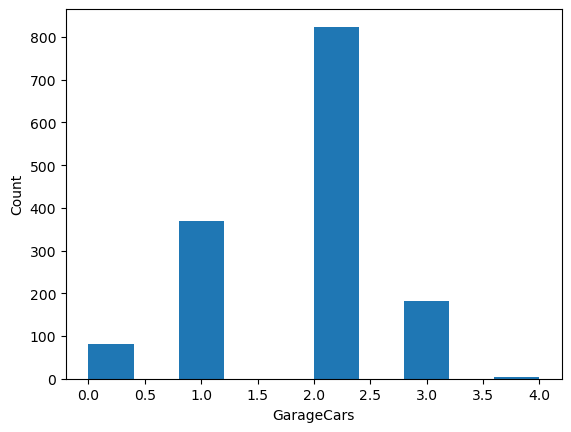

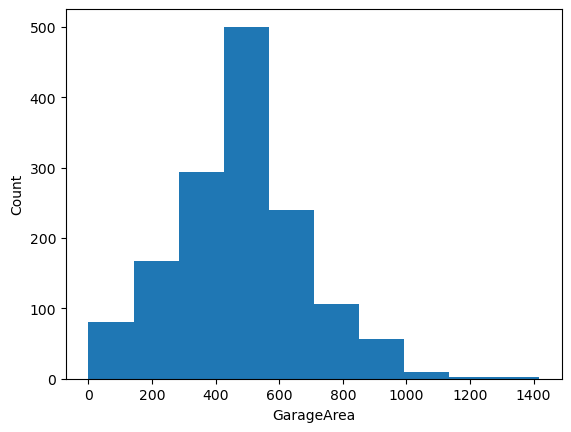

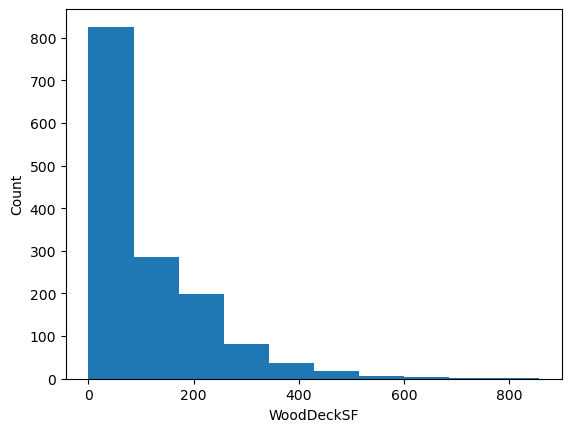

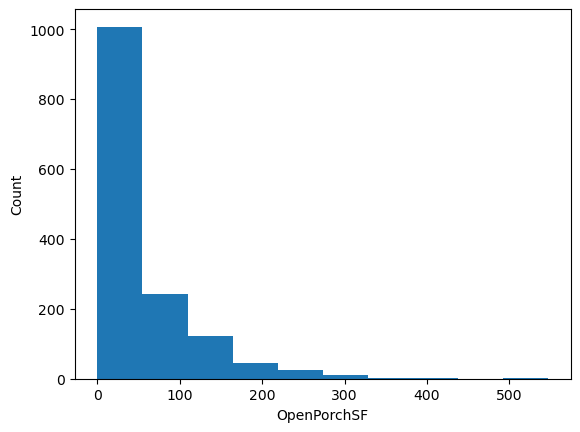

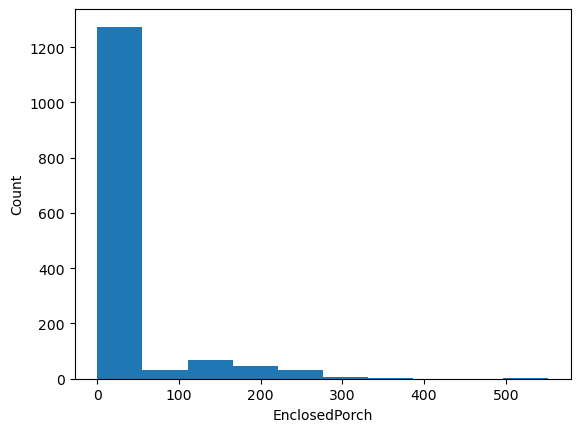

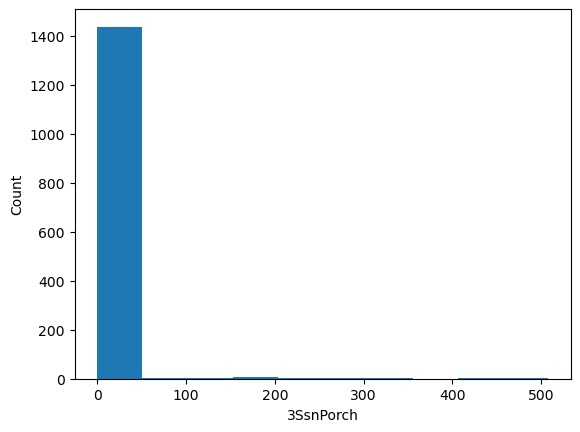

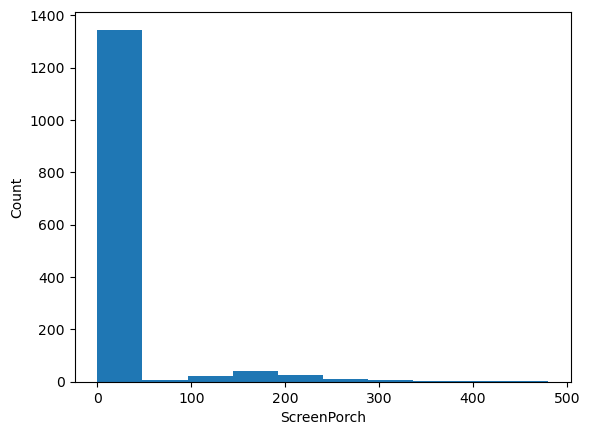

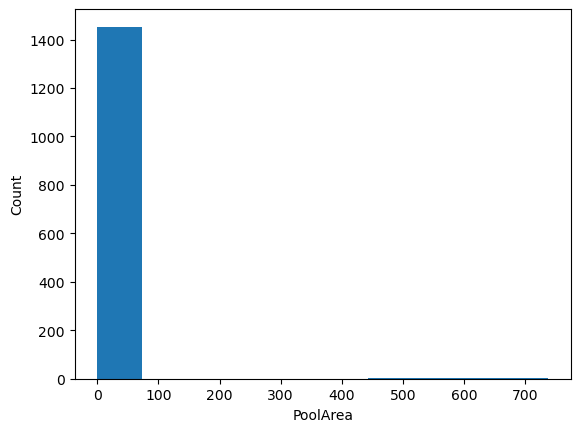

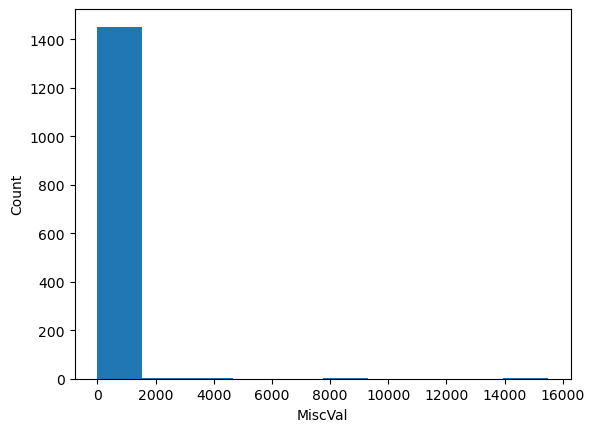

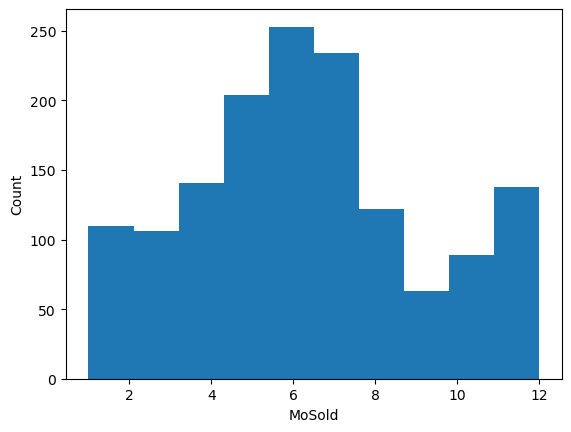

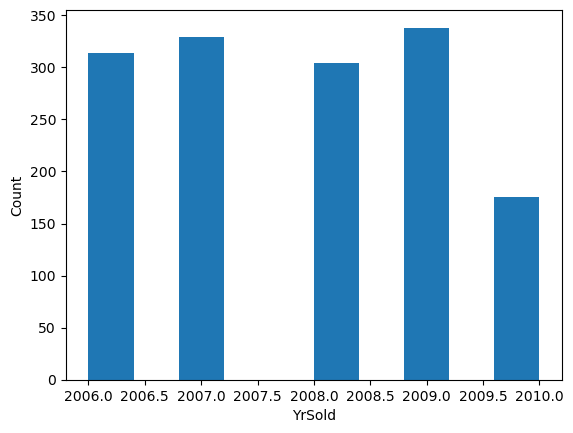

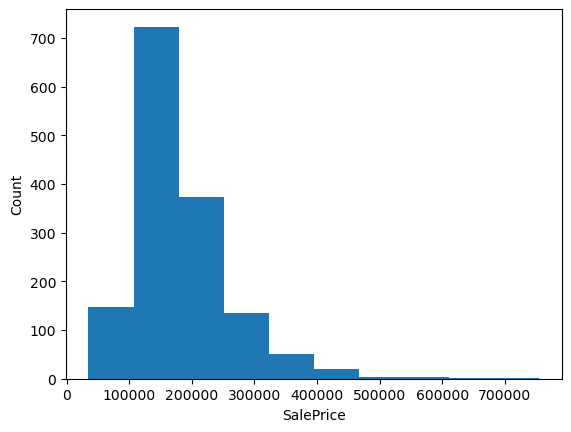

In [16]:
# Using a for loop to create histograms of each numerical feature
for col in numeric_columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Correlations

Multicollinearity is an issue for our model, so we need to identify variables that have a significant correlation with each other.

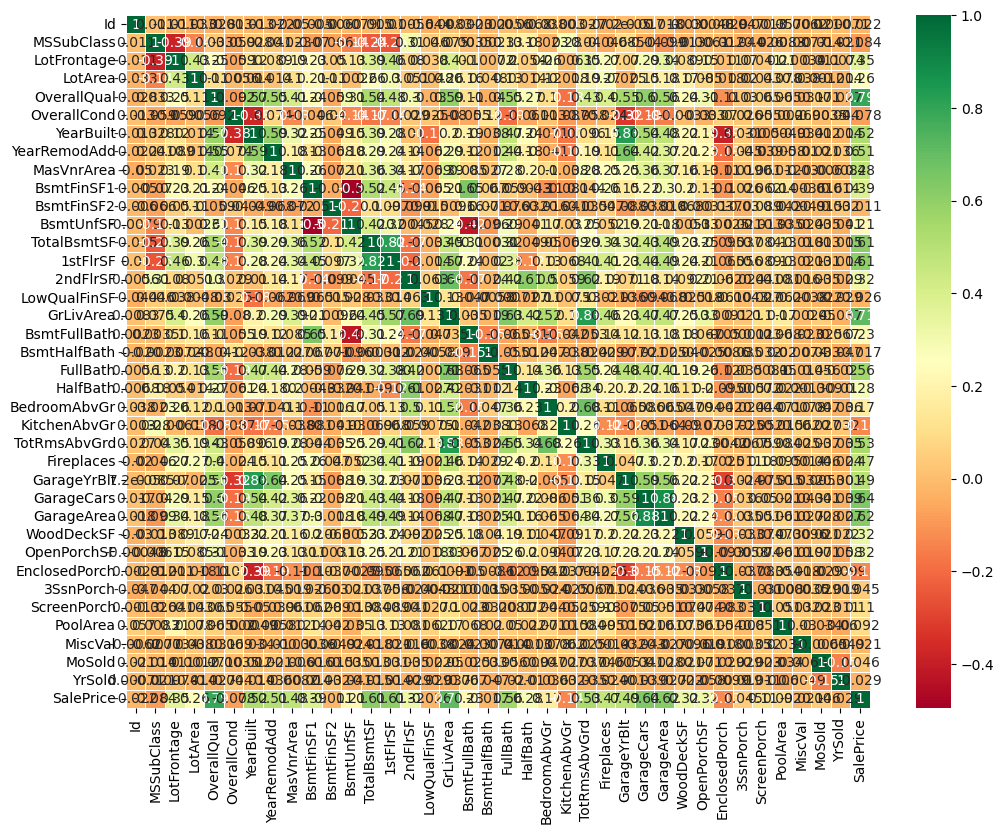

In [17]:
# See the correlation of each feature to each other
numeric_df = df[numeric_columns]
plt.subplots(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap= 'RdYlGn', linewidths=.5)
plt.show()

In [18]:
# showing the full correlation table, as the size of the matrix above makes readability an issue
numeric_df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

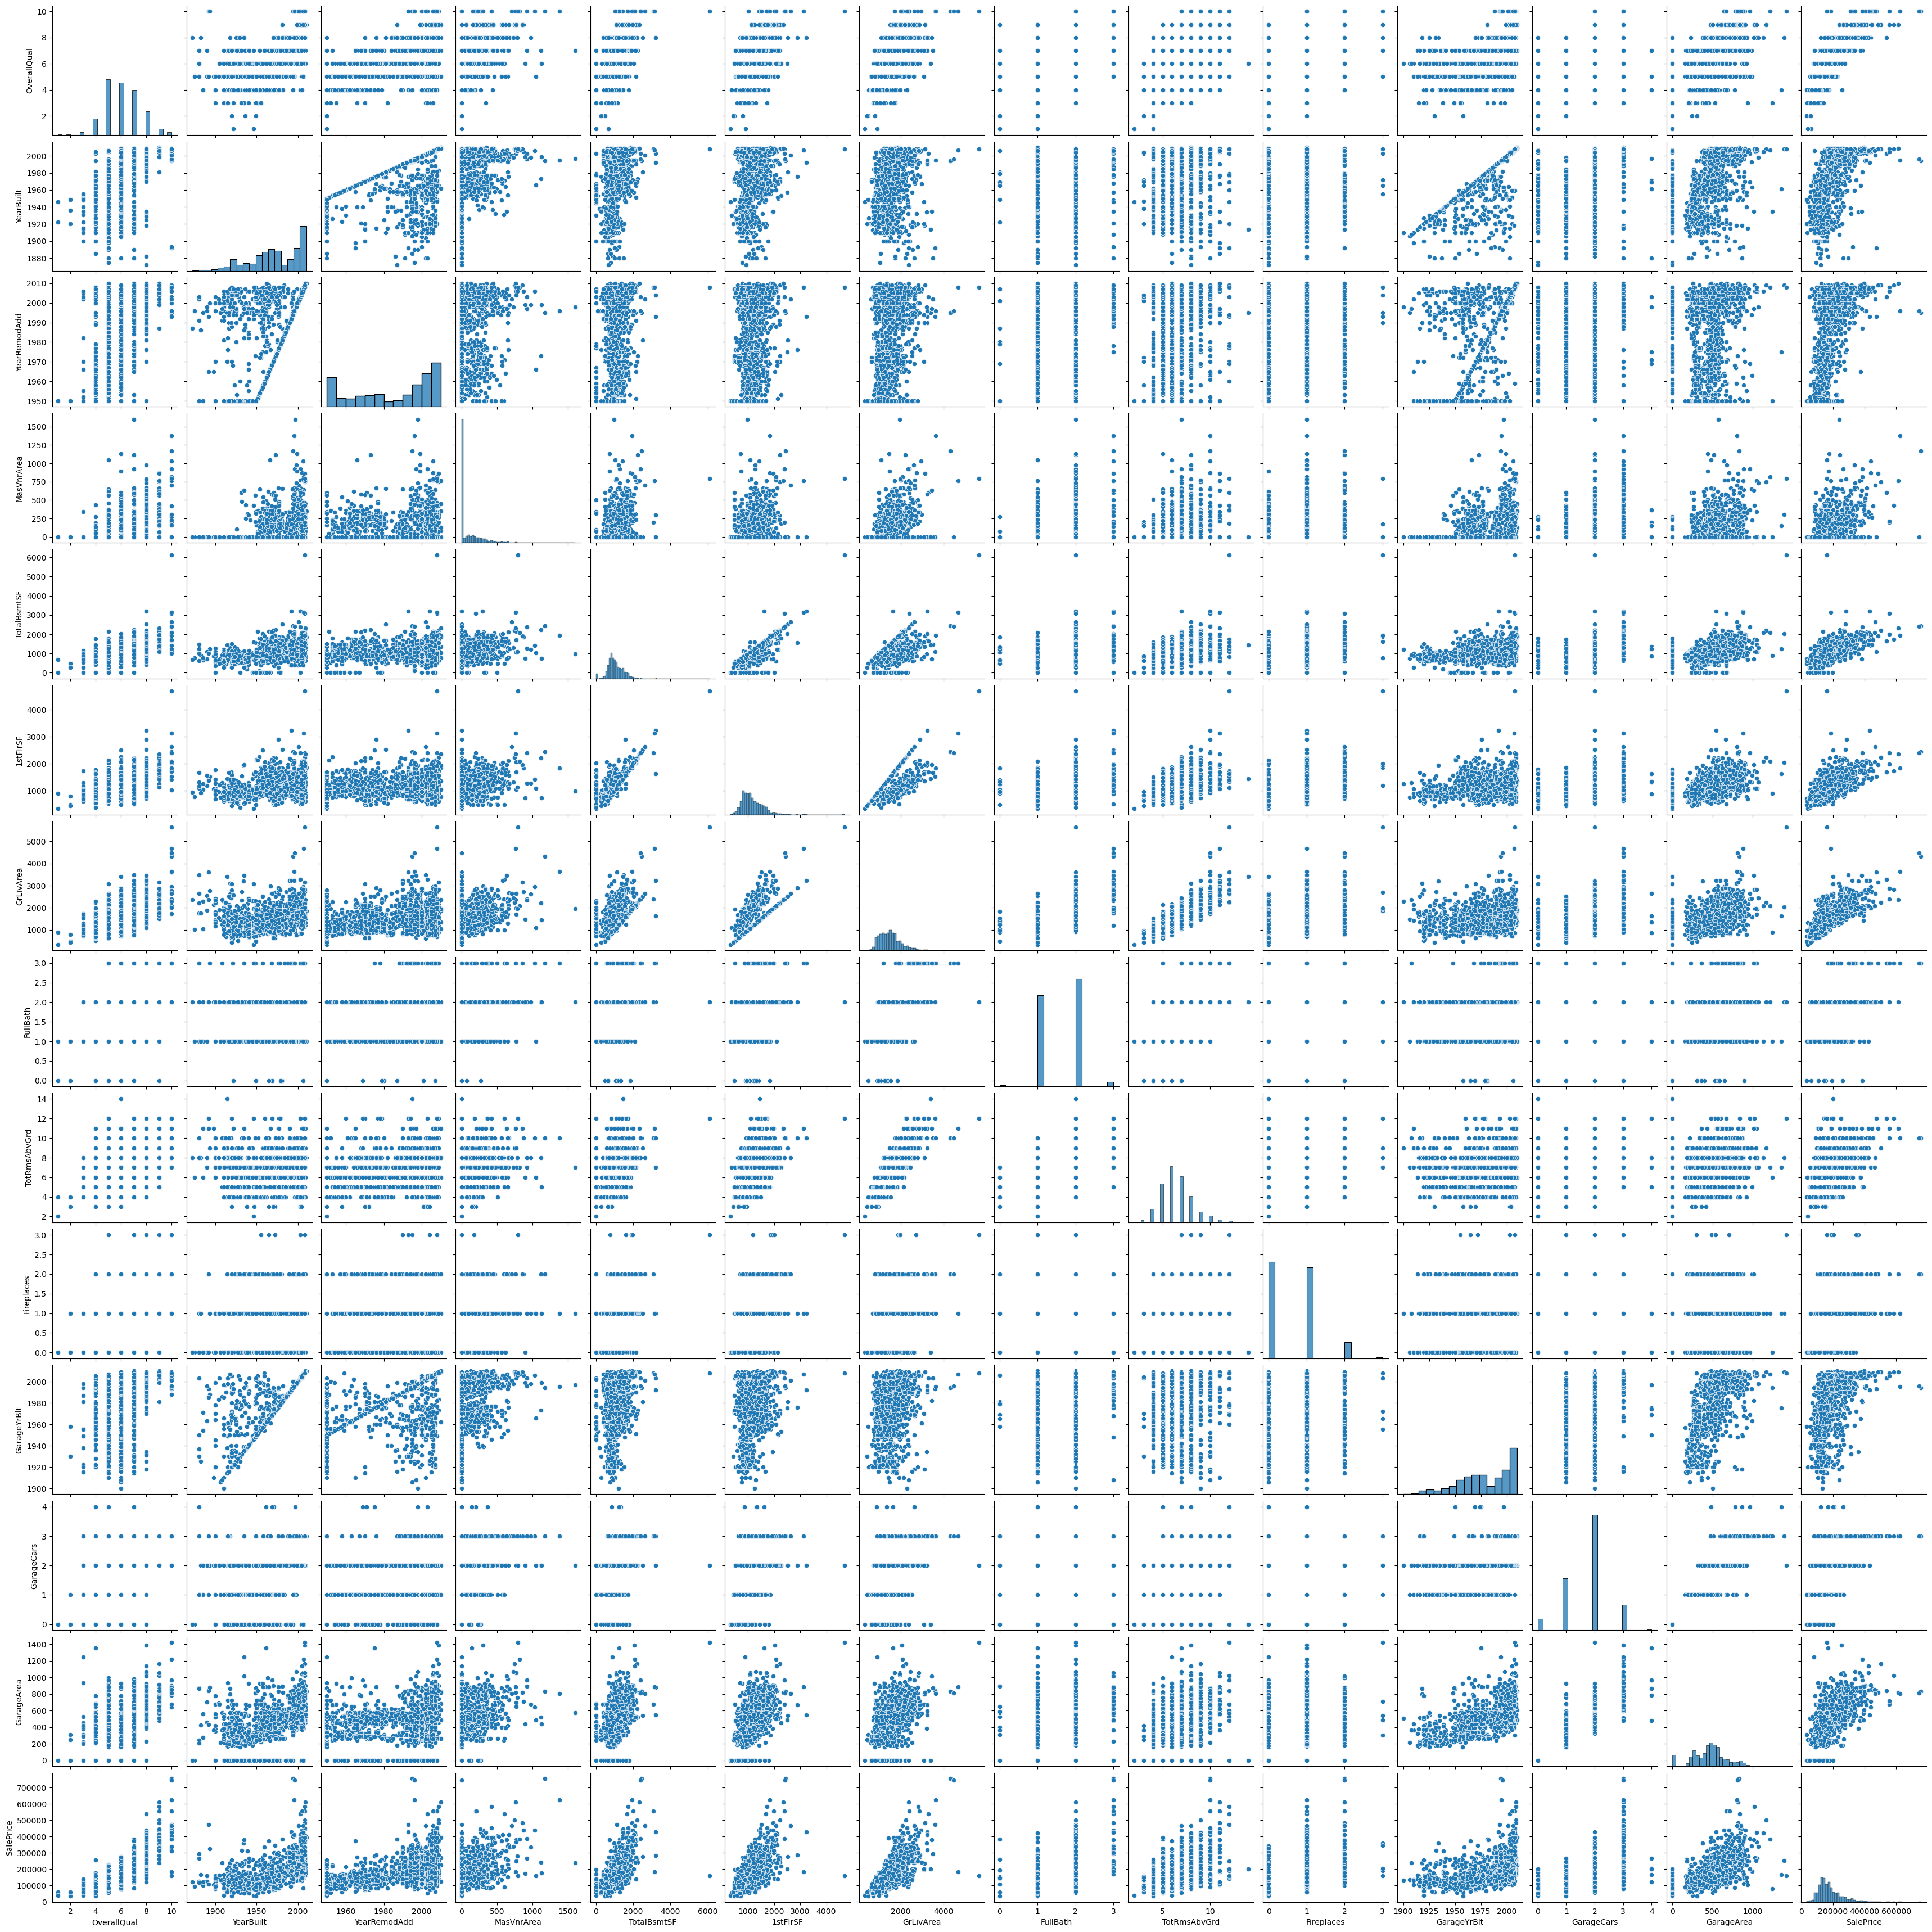

In [19]:
## create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'])
plt.show()

Eliminating features

In [20]:
# include numerical features whose correlation coefficient is greater than the threshold
threshold = 0.45
corr_number = pd.DataFrame([df[i].corr(df.SalePrice) for i in df.select_dtypes(include = 'number')],
             index = df.select_dtypes(include = 'number').columns, columns = ['SalePrice'])
corr_number.loc[corr_number.SalePrice > threshold,:].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

SalePrice  GrLivArea
523      184750       4676
691      755000       4316
1182     745000       4476
1298     160000       5642

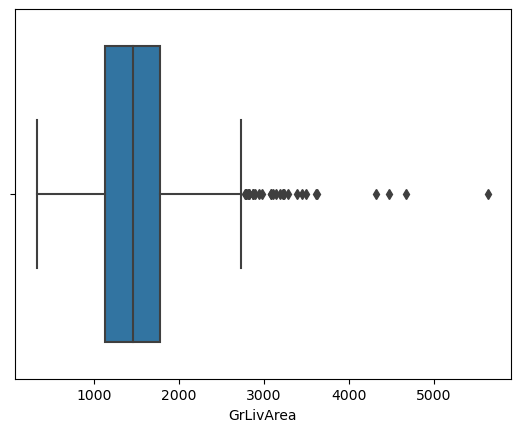

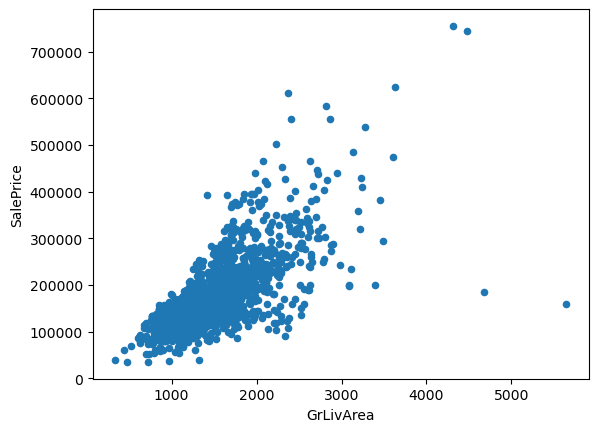

In [21]:
# plot graphs to see the relationship between these features and SalePrice clearly and remove outlier
sns.boxplot(x=df.GrLivArea)
df.plot(x="GrLivArea",y ="SalePrice", kind="scatter")
df.loc[df.GrLivArea > 4000,["SalePrice","GrLivArea"]]

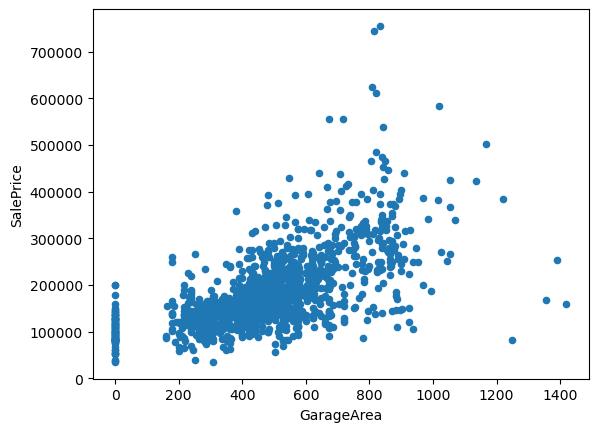

In [22]:
# plot graphs to see the relationship between these features and SalePrice clearly and remove outlier
df.plot(x="GarageArea",y ="SalePrice", kind="scatter")
df.loc[df.GarageArea > 1200,["SalePrice","GarageArea"]]
df.drop(axis=0, index=1298,inplace=True)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

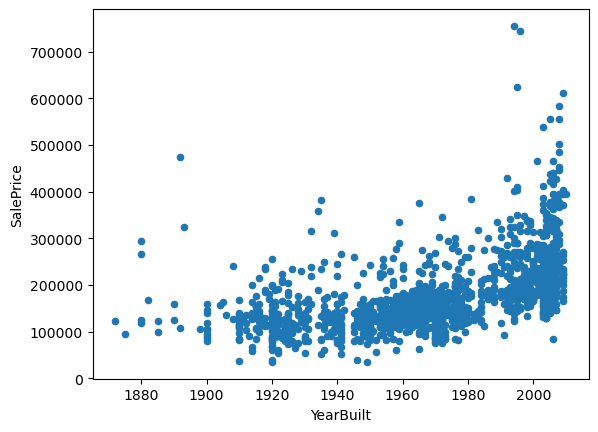

In [23]:
# plot graphs to see the relationship between these features and SalePrice clearly
df.plot(x="YearBuilt",y ="SalePrice", kind="scatter")

## Cleaning and Refining

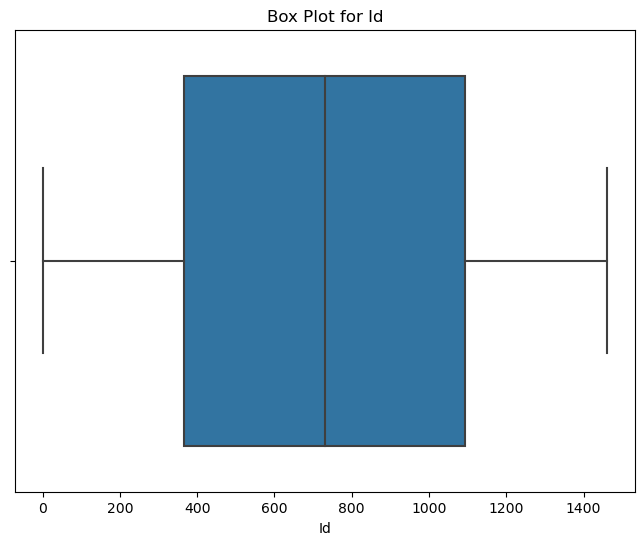

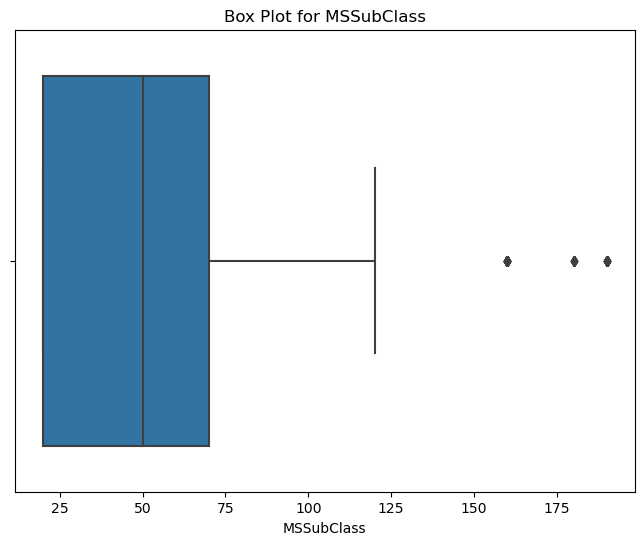

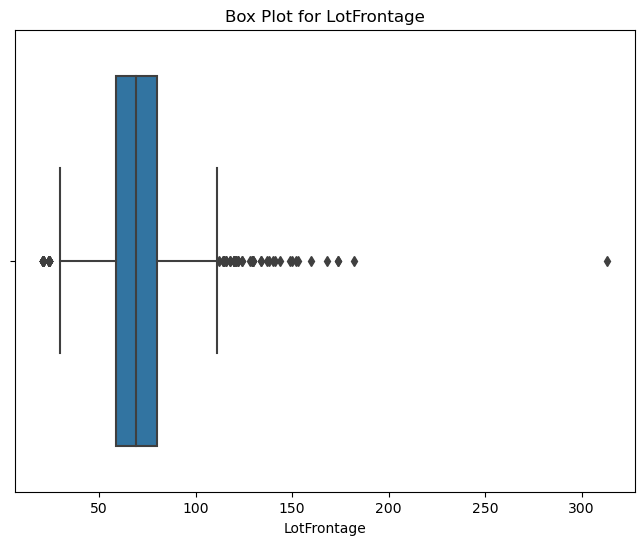

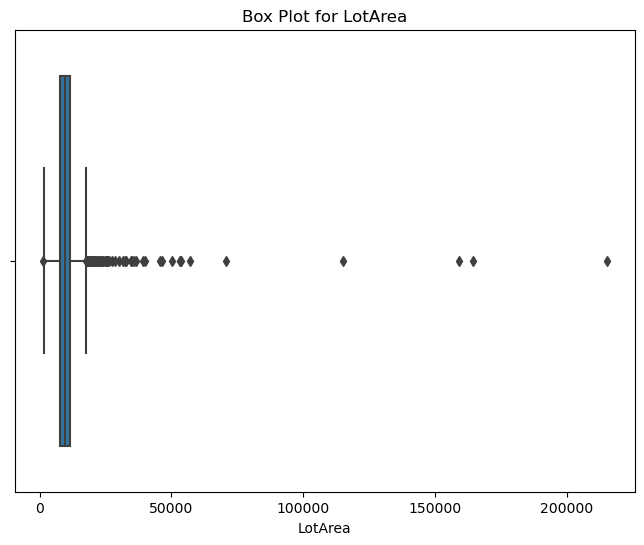

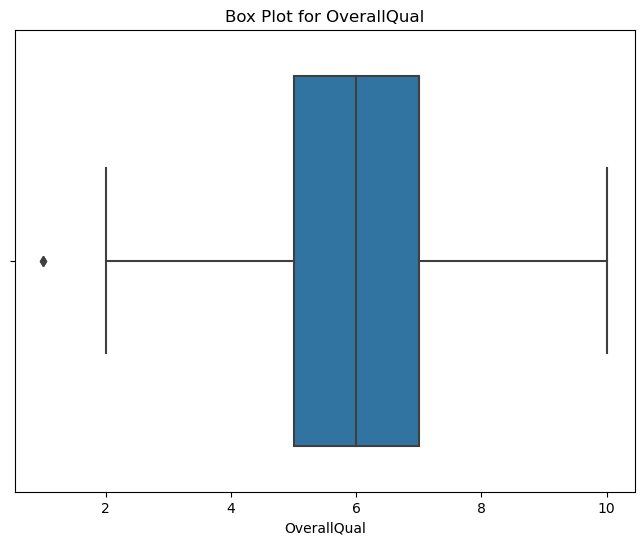

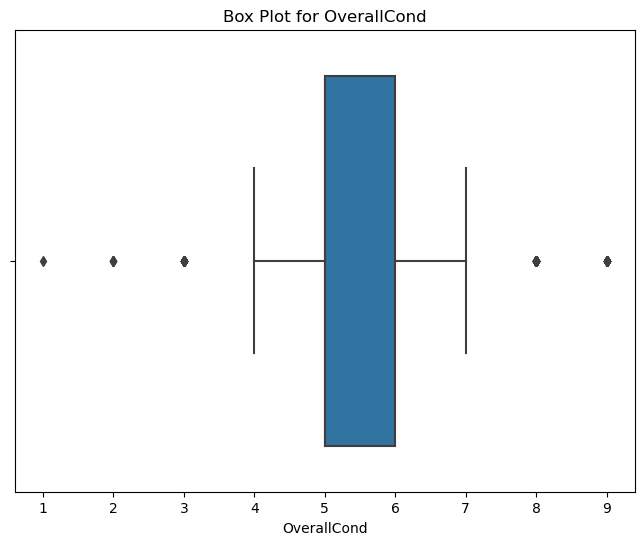

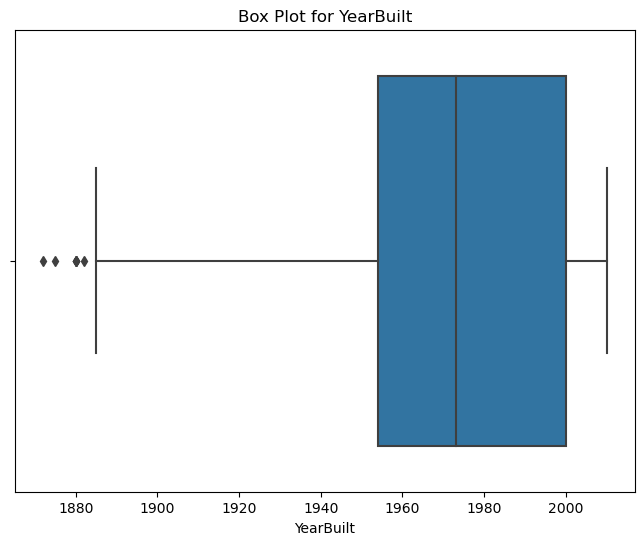

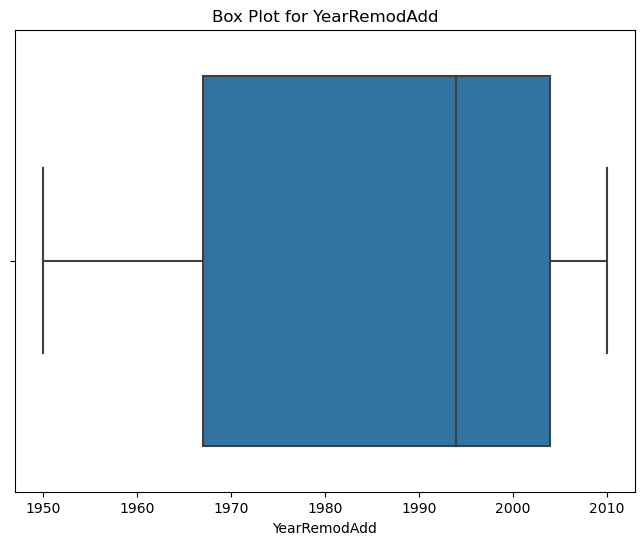

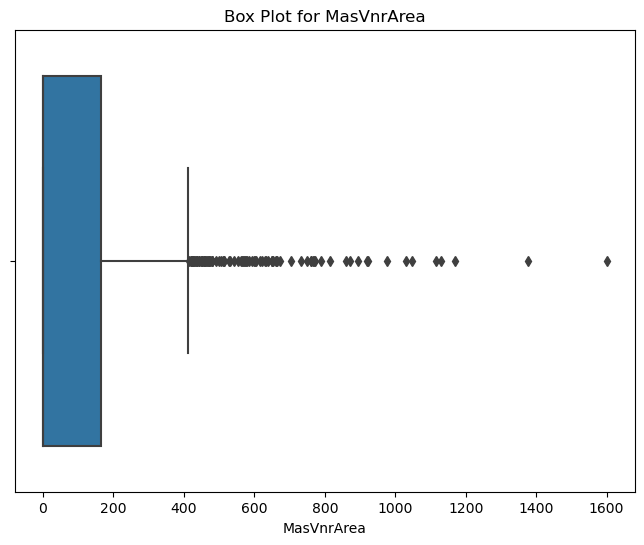

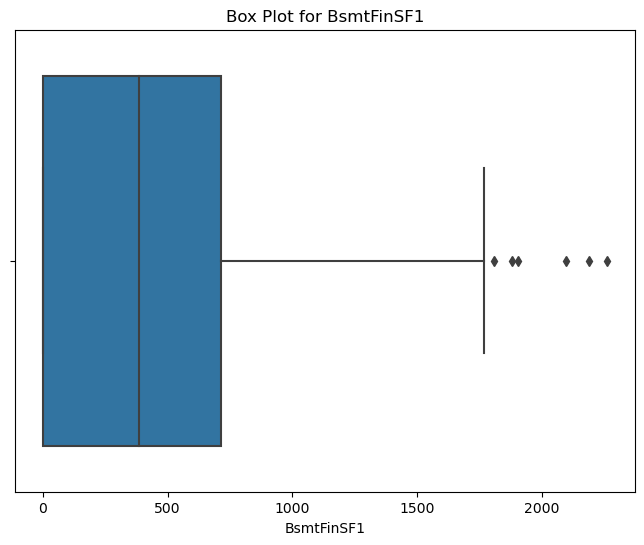

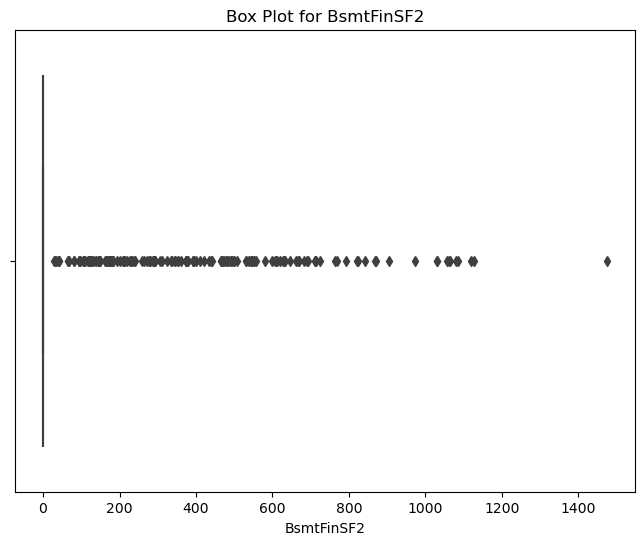

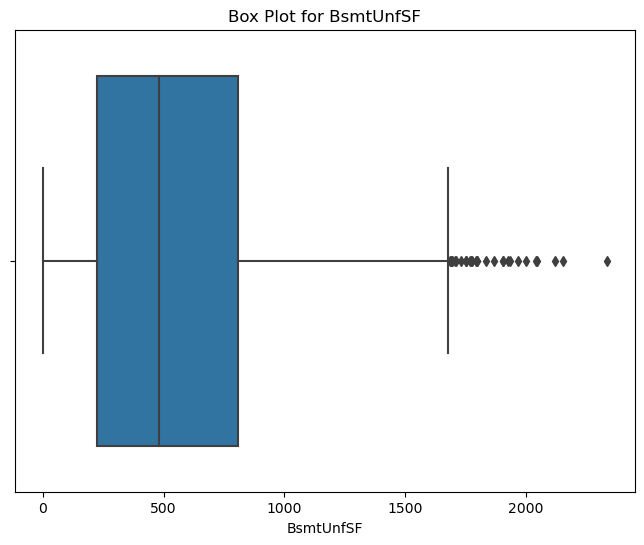

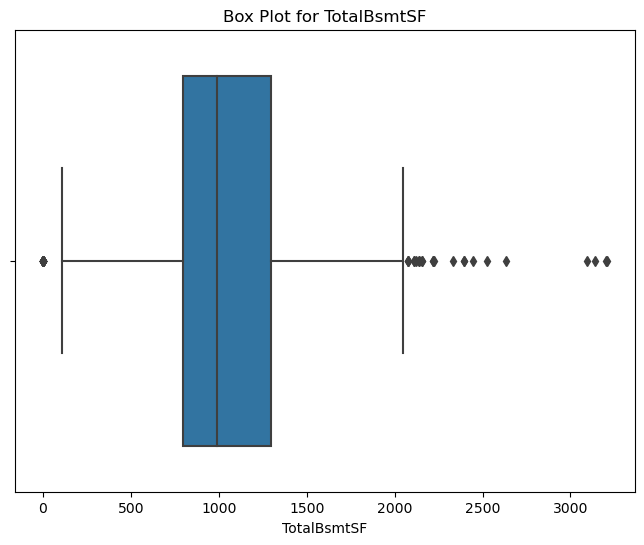

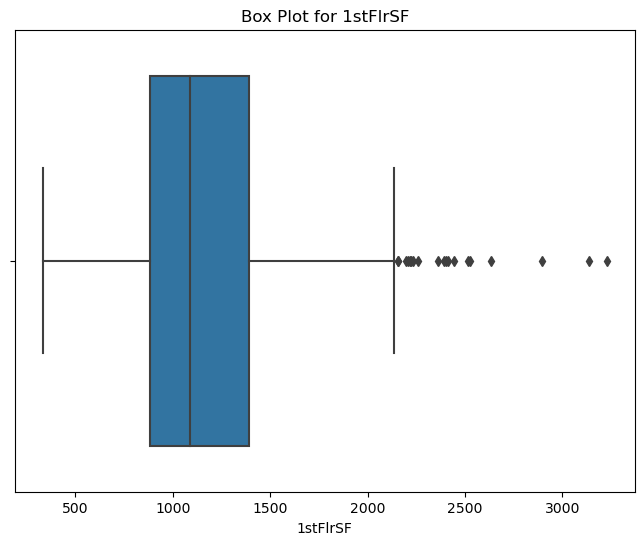

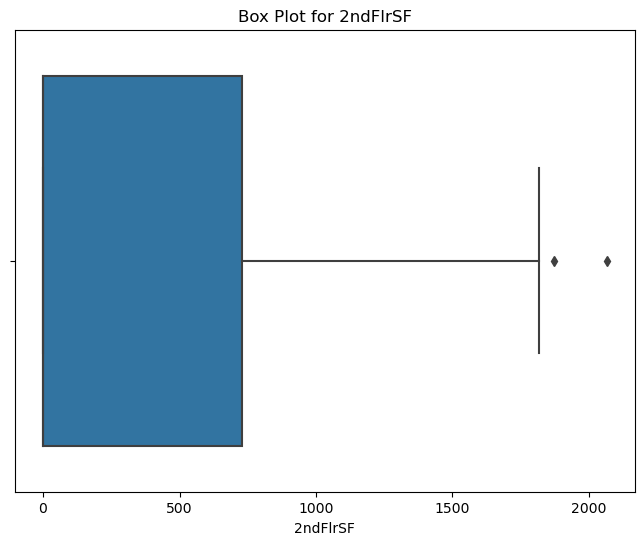

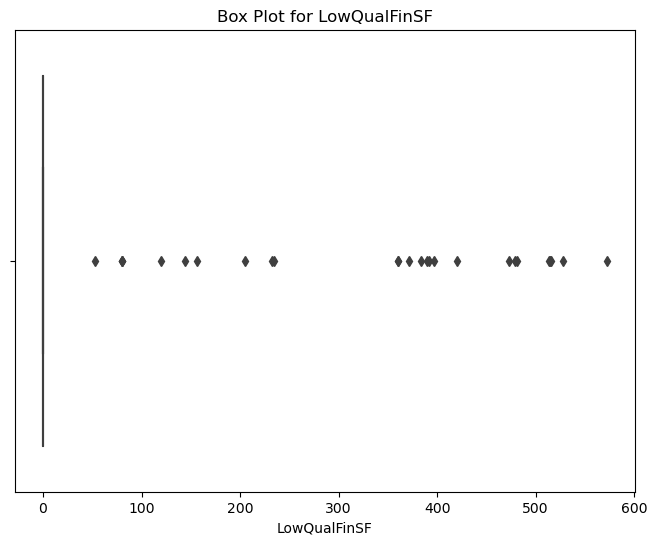

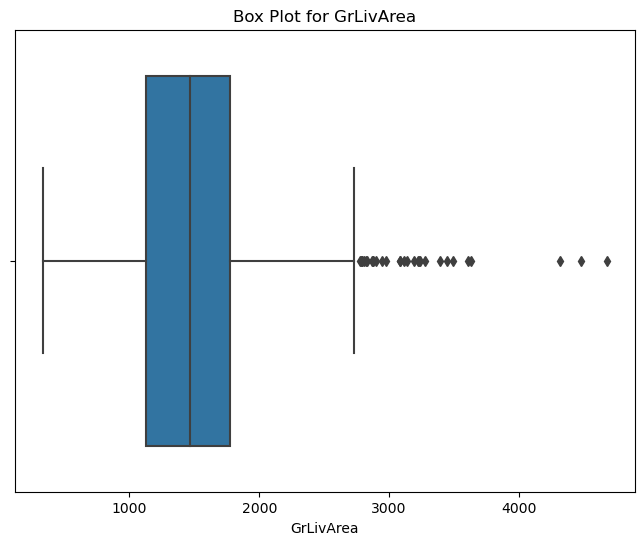

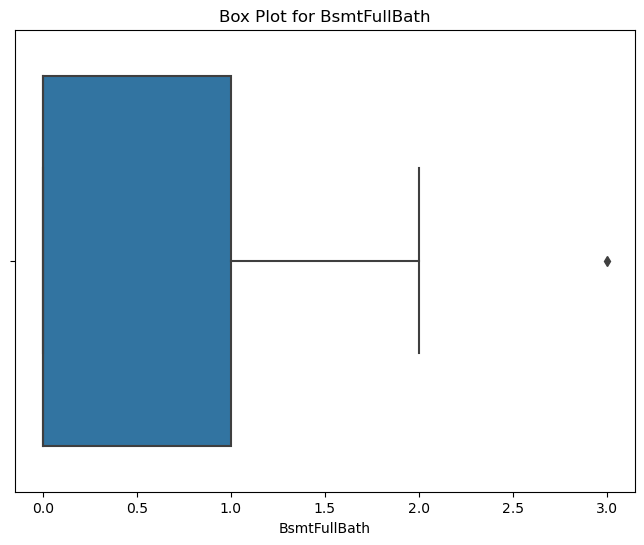

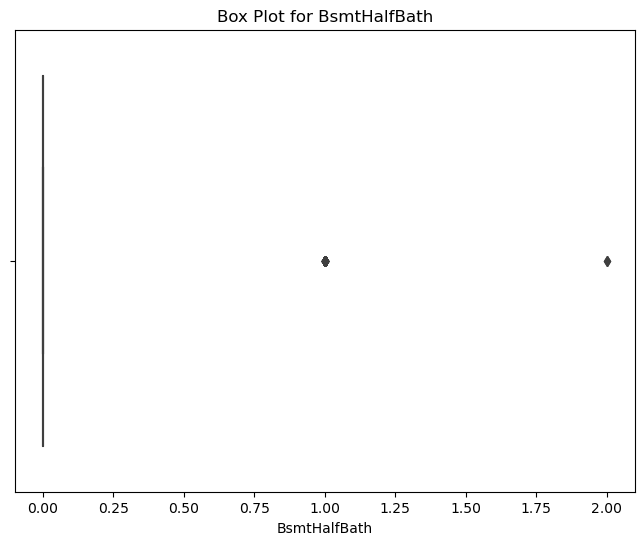

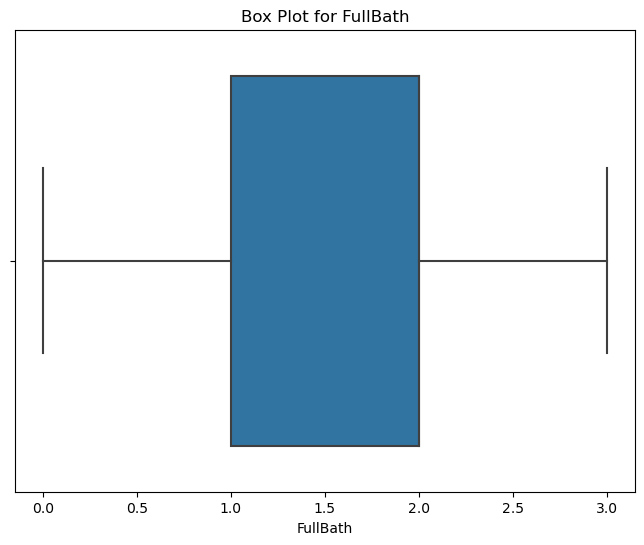

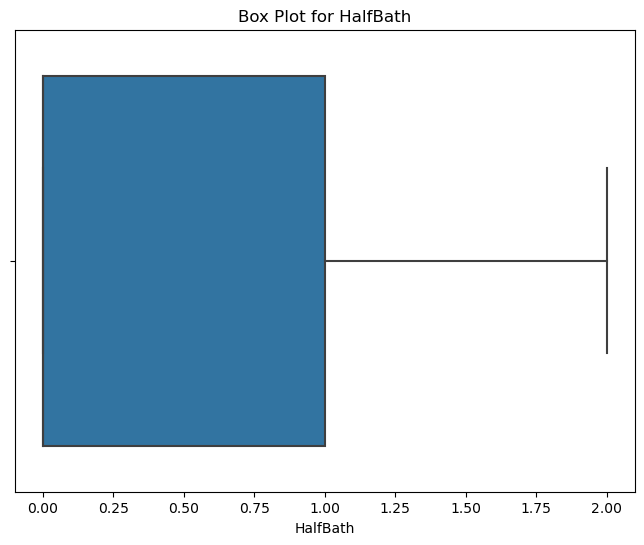

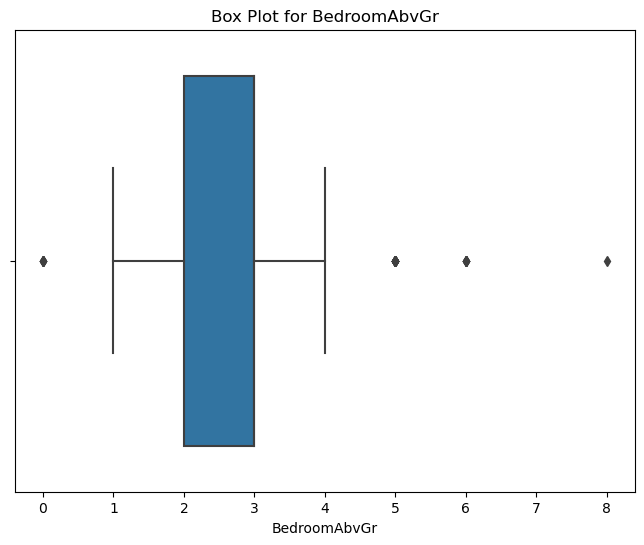

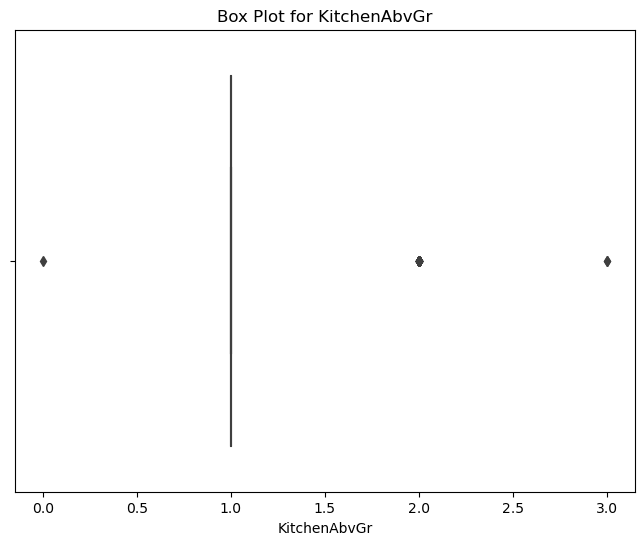

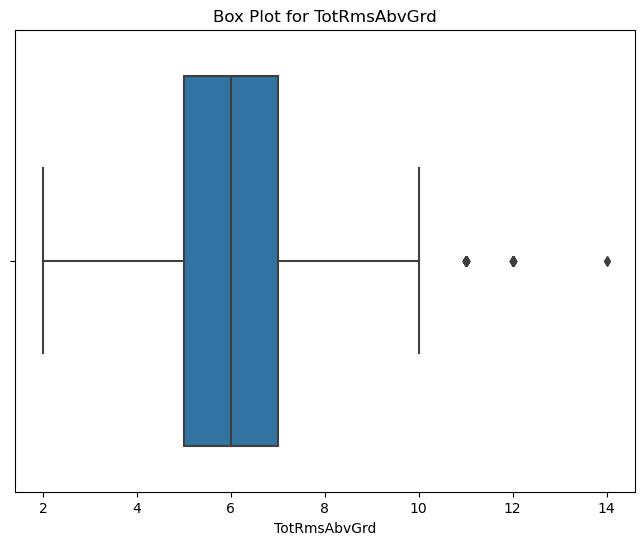

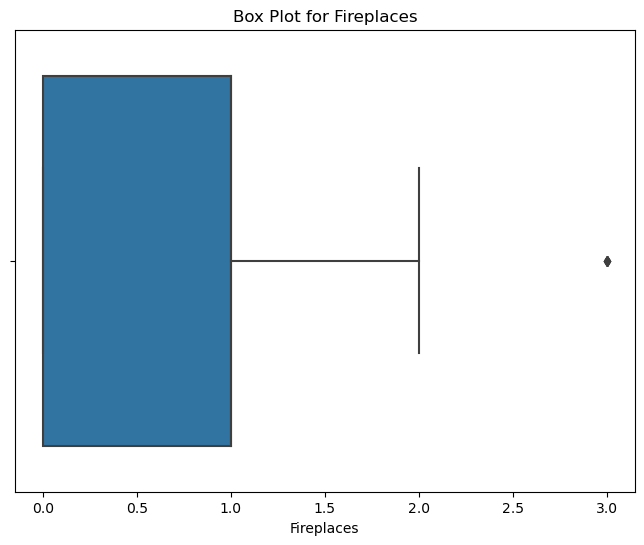

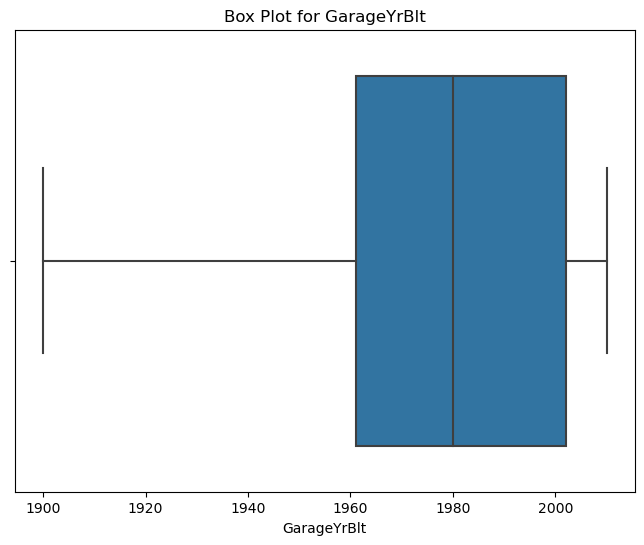

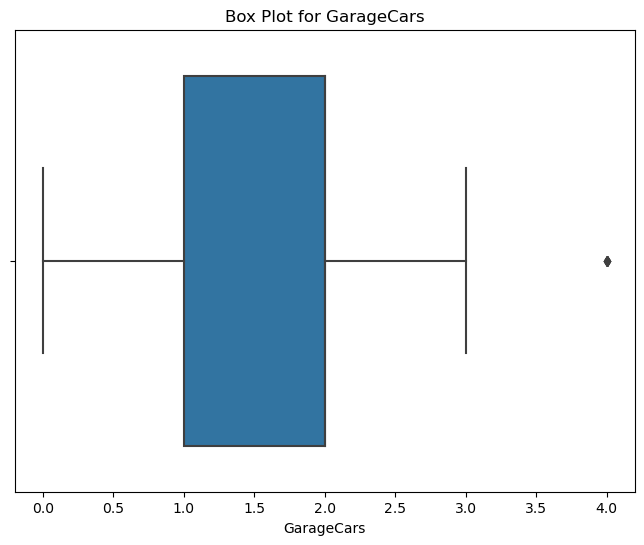

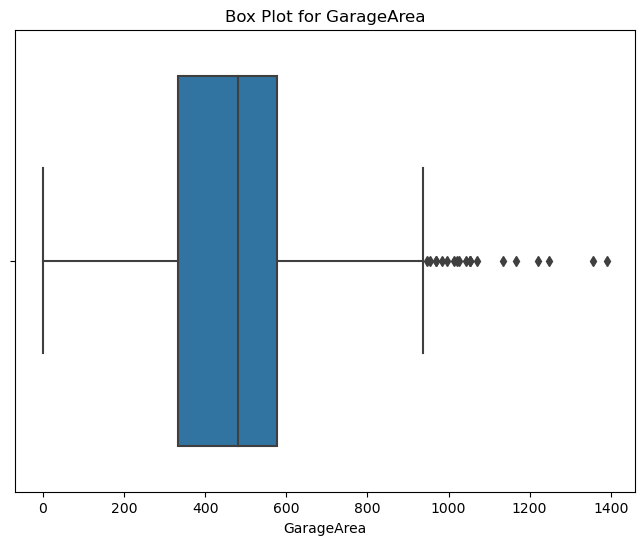

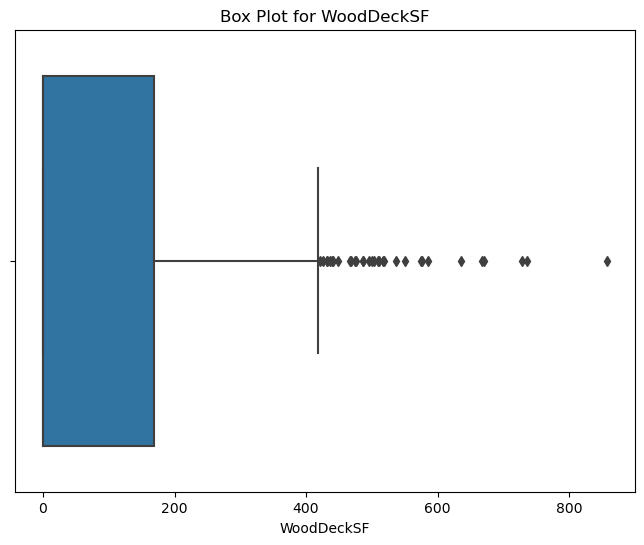

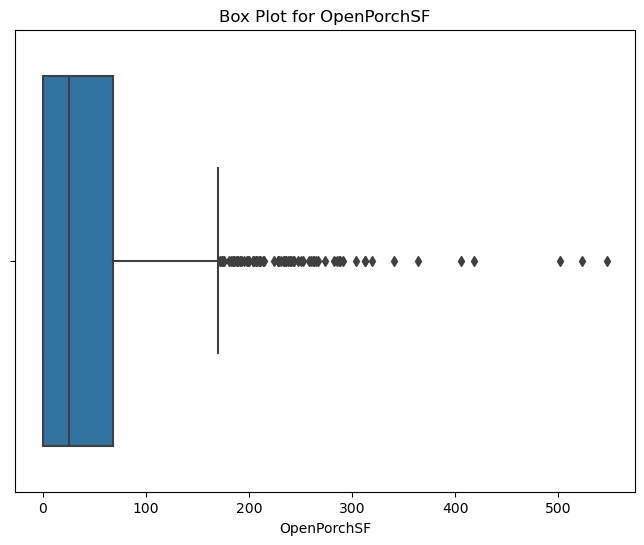

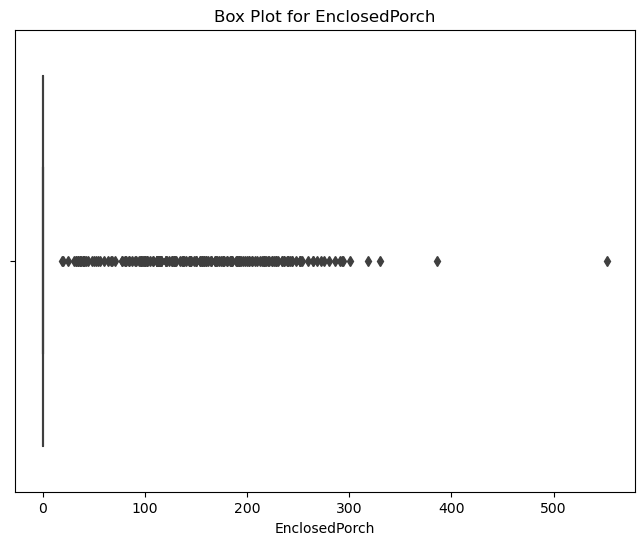

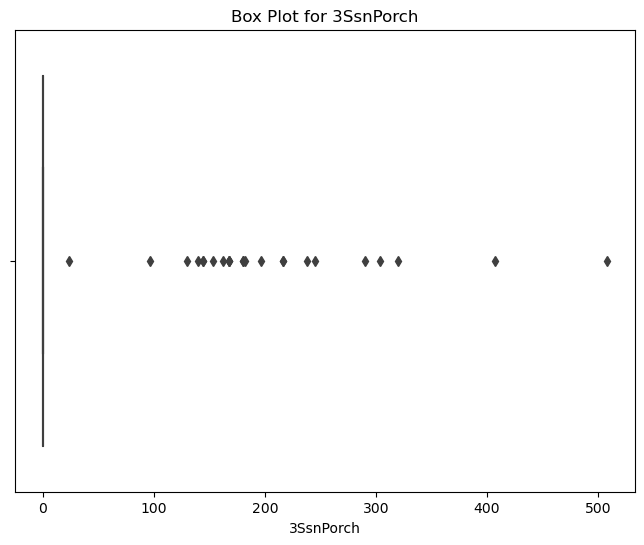

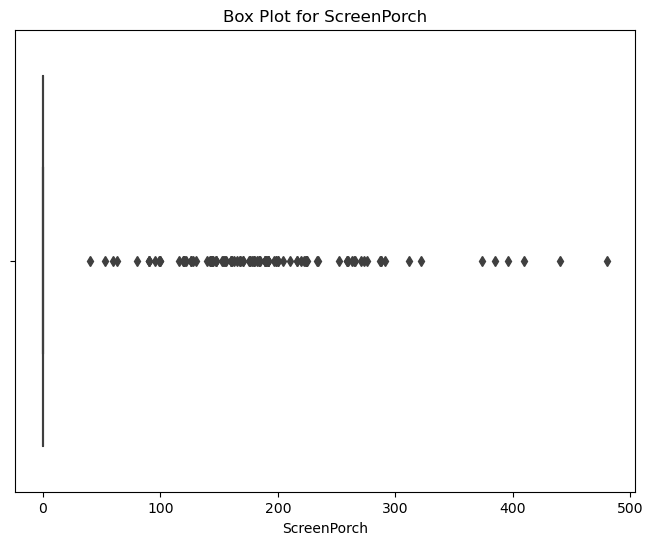

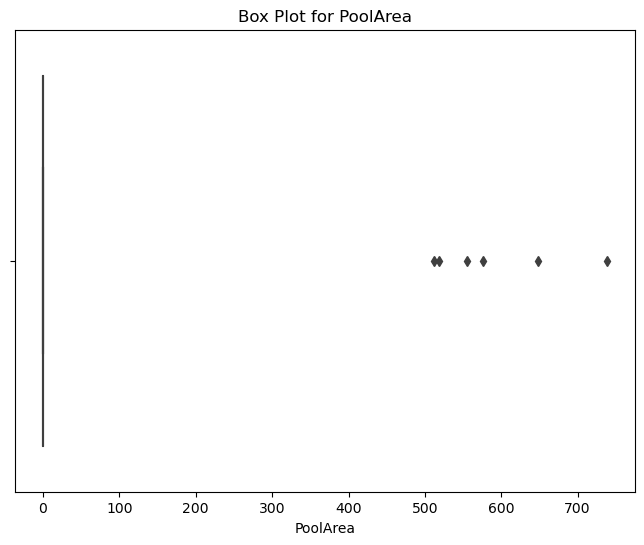

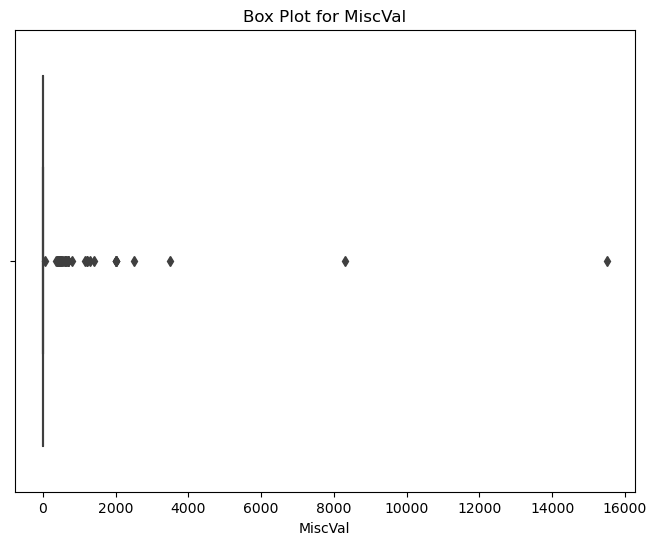

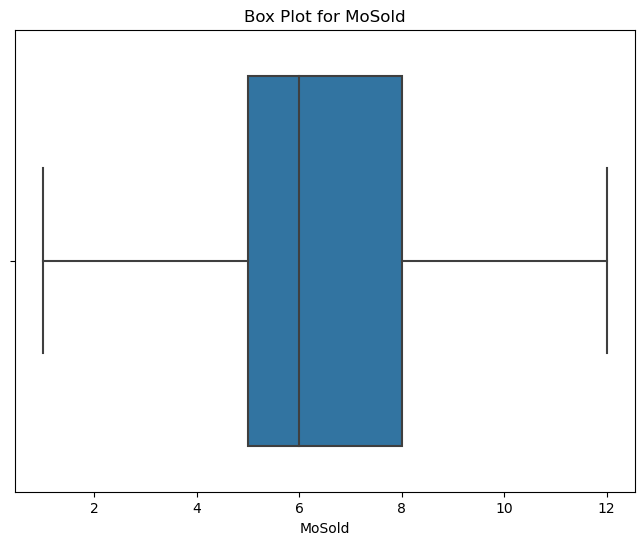

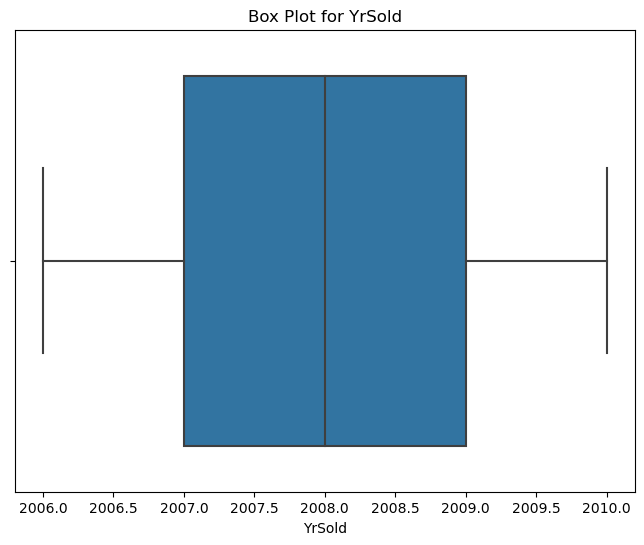

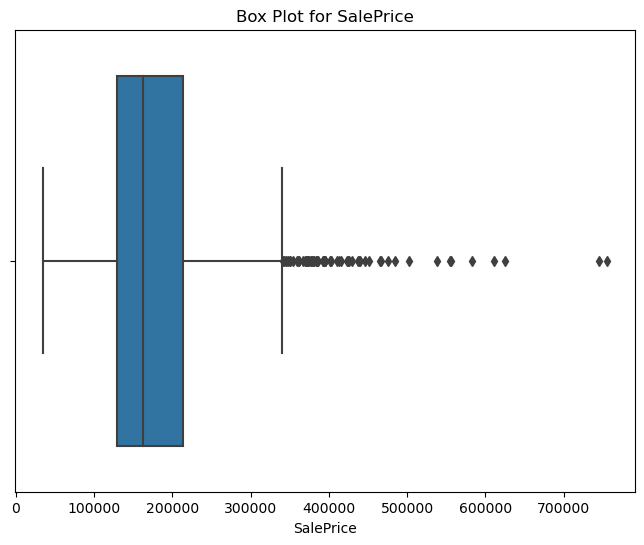

               Missing Values  Missing Values Percentage  Duplicate Records  \
1stFlrSF                    0                   0.000000                  0   
2ndFlrSF                    0                   0.000000                  0   
3SsnPorch                   0                   0.000000                  0   
Alley                    1369                  93.831391                  0   
BedroomAbvGr                0                   0.000000                  0   
BldgType                    0                   0.000000                  0   
BsmtCond                   37                   2.535984                  0   
BsmtExposure               38                   2.604524                  0   
BsmtFinSF1                  0                   0.000000                  0   
BsmtFinSF2                  0                   0.000000                  0   
BsmtFinType1               37                   2.535984                  0   
BsmtFinType2               38                   2.60

In [24]:
# Create quality report for numerical values
def data_quality_report(df):

  # missing values
  missing_values_percentage = missing_values / df.shape[0] * 100

  # duplicate records
  duplicate_records = df[df.duplicated()]
    
  # Check for outliers
  numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
  Q1 = df[numeric_columns].quantile(0.25)
  Q3 = df[numeric_columns].quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))
  outliers_count = outliers.sum()

  # Create a data quality report dataframe
  report = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Values Percentage": missing_values_percentage,
    "Duplicate Records": duplicate_records.shape[0],
    "Outliers": outliers_count
  })

    # Visualize outliers using box plots
  for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

  return report

# Create the data quality report
report = data_quality_report(df)

# Print the report
print(report)

In [25]:
# filling in missing values of MasVnrArea
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)

In [26]:
# Numerical features to include when training
feature_numerical = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'TotRmsAbvGrd', 'Fireplaces', 'MSSubClass']

In [29]:
# fill NA values with appropriate information.
df.Alley.fillna("no", inplace = True)

for i in cat_f.columns:
    print(df.groupby(by=df[i]).SalePrice.mean())
    print()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191031.955652
RM         126316.830275
Name: SalePrice, dtype: float64

Street
Grvl    130190.500000
Pave    181145.081211
Name: SalePrice, dtype: float64

Alley
Grvl    122219.080000
Pave    168000.585366
no      183469.274854
Name: SalePrice, dtype: float64

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    222262.777778
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour
Bnk    142831.564516
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

Utilities
AllPub    180965.326475
NoSeWa    137500.000000
Name: SalePrice, dtype: float64

LotConfig
Corner     181705.958015
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

LandSlope
Gtl    179971.250543
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    

In [30]:
for df in [df]:
    for i in ['BsmtQual','BsmtCond']:
        df[i].fillna('no',inplace= True)
        print (df.BsmtQual.value_counts())

TA    649
Gd    618
Ex    120
no     37
Fa     35
Name: BsmtQual, dtype: int64
TA    649
Gd    618
Ex    120
no     37
Fa     35
Name: BsmtQual, dtype: int64


In [31]:
for df in [df]:
    for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond']:
        df[i] = df[i].map({'TA':3, 'Gd':2, 'Ex':1, 'Po':5, 'Fa':4,'no': 5})

In [32]:
# Categorical features to include when training
feature_categorical = ['ExterQual','ExterCond','BsmtQual']

In [33]:
# Features to include when training
final_features = feature_numerical + feature_categorical
final_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'TotRmsAbvGrd',
 'Fireplaces',
 'MSSubClass',
 'ExterQual',
 'ExterCond',
 'BsmtQual']